In [1]:
import numpy as np
import pandas as pd
import random
import shap
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#individuals
n = 50
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected
#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)

#initialize G matrix
G = np.zeros((n, m));

# choose random SNP
loci =random.randint(0,m-1)

#frequency of that loci from our uniform distribution
f_i = f_M[loci]

#select SNP
SNP = G[:,loci]

#will be used to flip a coin based on f_i
#higher f_i frequency = higher chance of returning true
def loci_frequency_flip(f_i):
    return random.random() < f_i

#here im "fliiping" the coin only for the SNP
for k in range(0, len(SNP)):
    if(loci_frequency_flip(f_i)):
        SNP[k] = 1

# #use this if I wanted to populate entire G matrix
# #k are the colums(loci)
# for k in range (0, len(G[0])):
#     # j are the rows(individuals)
#     for j in range (0, len(G)):
#         #frequency of loci k we are currently on
#         if(loci_frequency_flip(f_M[k])):
#             G[j,k] = 1
              
print(SNP)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1.]


In [3]:

# mean and standard deviation
H=0
#assumes that we are making a Y_j for every individual in the SNP and 
#in each loop we choose a e_j for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    
    #where columns are the individuals
    mean = 0 
    
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1));
    
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H


In [4]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.1,.1)

In [5]:
#third function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y))

Phenotypes for loci 83 are [[ 0.65685439]
 [-0.21775083]
 [-0.5394128 ]
 [-0.27771352]
 [-0.12268348]
 [ 0.52237858]
 [ 0.46388293]
 [-0.22047985]
 [ 0.01546553]
 [-0.00534451]
 [-0.07688788]
 [-0.015809  ]
 [-0.08710767]
 [-0.11602033]
 [-0.03060667]
 [-0.04626747]
 [-0.13382129]
 [-0.05615738]
 [ 0.64886063]
 [ 0.31665195]
 [-0.37621665]
 [ 0.06656332]
 [ 0.10641714]
 [-0.13960516]
 [ 0.06231737]
 [-0.09244918]
 [-0.01143886]
 [-0.12123505]
 [ 0.23543575]
 [ 0.40855635]
 [ 0.77064927]
 [ 0.81195672]
 [ 0.16057281]
 [ 1.09545975]
 [-0.06207008]
 [ 0.18628126]
 [-0.26484593]
 [-0.18426738]
 [-0.61900292]
 [ 0.35946792]
 [ 0.04158342]
 [ 0.50766519]
 [-0.03828837]
 [-0.2610028 ]
 [ 0.59730989]
 [ 0.26633438]
 [ 0.01072157]
 [ 0.1831043 ]
 [-0.20062653]
 [-0.22829988]]


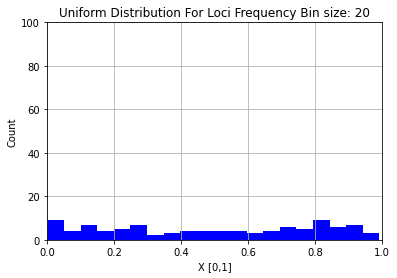

In [6]:
#use this to see distribution of f_i frequency
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [7]:
#starting machine learning classification
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [8]:
#split data into test and train
X = G[:,0:len(G[0])-2]
y = G[:,len(G[0])-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [9]:
#initialize SVM with RBF kernal
my_SVM = svm.SVC(C=1, kernel='rbf', gamma=0.0005,random_state=1)